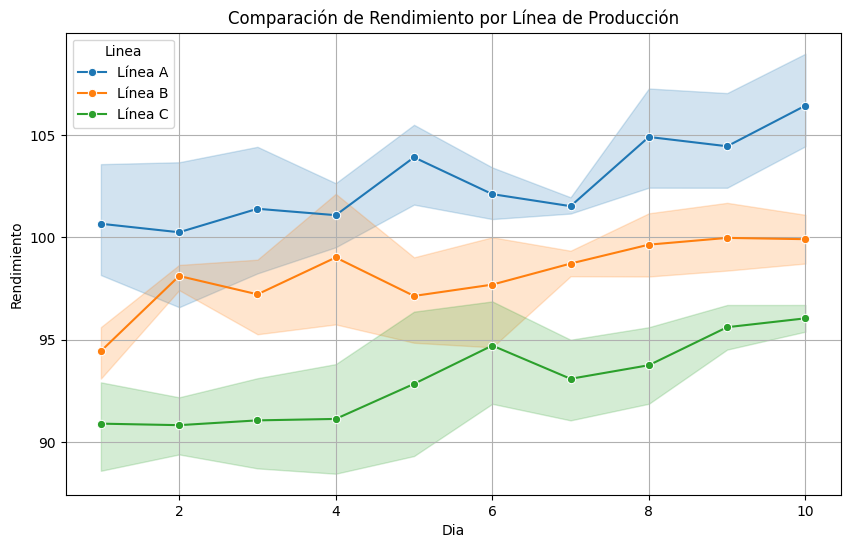

In [1]:
# 📦 Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# 🔧 Simulación de datos
np.random.seed(1)

lineas = ['Línea A', 'Línea B', 'Línea C']
dias = list(range(1, 11))  # 10 días de medición
datos = []

for linea in lineas:
    for dia in dias:
        rendimiento_base = {
            'Línea A': 100,
            'Línea B': 95,
            'Línea C': 90
        }[linea]
        rendimiento = np.random.normal(loc=rendimiento_base + dia*0.5, scale=3, size=5)  # 5 mediciones por día
        for r in rendimiento:
            datos.append([linea, dia, r])

df = pd.DataFrame(datos, columns=['Linea', 'Dia', 'Rendimiento'])

# 📊 Visualizar
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Dia', y='Rendimiento', hue='Linea', marker='o')
plt.title("Comparación de Rendimiento por Línea de Producción")
plt.grid(True)
plt.show()


In [2]:
# 🔍 Modelo Mixto: Rendimiento ~ Línea + (1|Día)
modelo_mixto = mixedlm("Rendimiento ~ Linea", data=df, groups=df["Dia"])
resultado = modelo_mixto.fit()
print(resultado.summary())


             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   Rendimiento
No. Observations:   150       Method:               REML       
No. Groups:         10        Scale:                7.3613     
Min. group size:    15        Log-Likelihood:       -369.2485  
Max. group size:    15        Converged:            Yes        
Mean group size:    15.0                                       
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        102.673    0.627 163.726 0.000 101.444 103.903
Linea[T.Línea B]  -4.483    0.543  -8.262 0.000  -5.547  -3.420
Linea[T.Línea C]  -9.669    0.543 -17.819 0.000 -10.733  -8.606
Group Var          2.460    0.529                              

